In [1]:
#1) Import libraries
import gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import namedtuple, deque
import Environments
from collections import OrderedDict

In [14]:
#2) Import and reshape reward lists
ddpg_step=np.load('load_model/parameters/ddpg-01-reward-step-2000000.npy')
ppo_step=np.load('load_model/parameters/ppo-01-reward-step-001000.npy')

ddpg_time=np.load('load_model/parameters/ddpg-01-reward-time-003600.npy')
ppo_time=np.load('load_model/parameters/ppo-01-reward-time-003601.npy')

ddpg_step=ddpg_step.reshape(-1,5).mean(axis=1)
ppo_step=ppo_step.reshape(-1,5).mean(axis=1)

l_d=len(ddpg_time)
l_p=len(ppo_time)
ddpg_time=ddpg_time[:l_d-l_d%5].reshape(-1,5).mean(axis=1)
ppo_time=ppo_time[:l_p-l_p%5].reshape(-1,5).mean(axis=1)

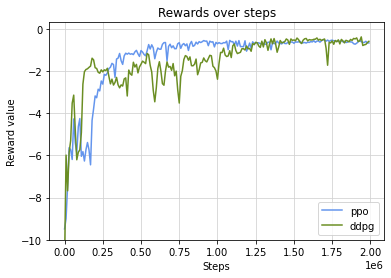

In [11]:
#3) Plot comparison reward versus step
steps_length=2000000
size_ppo=steps_length/len(ppo_step)
size_ddpg=steps_length/len(ddpg_step)
x_ppo=[i*size_ppo for i in range(len(ppo_step))]
x_ddpg=[i*size_ddpg for i in range(len(ddpg_step))]

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('Rewards over steps')
plt.xlabel("Steps")
plt.ylabel("Reward value")
plt.ylim(-10.0,0.3)
plt.plot(x_ppo,ppo_step,color='cornflowerblue',label='ppo')
plt.plot(x_ddpg,ddpg_step,color='olivedrab',label='ddpg')
plt.grid(True,color='lightgrey')
plt.legend()
#plt.savefig("PDF_results/reward_comparison_step_final.pdf")

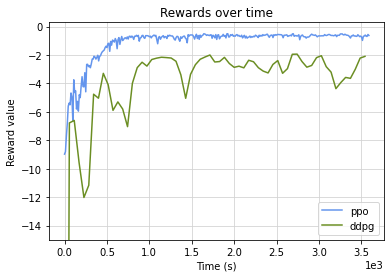

In [16]:
#3) Plot comparison reward versus step
time_length=3600
size_ppo=time_length/len(ppo_time)
size_ddpg=time_length/len(ddpg_time)
x_ppo=[i*size_ppo for i in range(len(ppo_time))]
x_ddpg=[i*size_ddpg for i in range(len(ddpg_time))]

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('Rewards over time')
plt.xlabel("Time (s)")
plt.ylabel("Reward value")
plt.ylim(-15.0,0.3)
plt.plot(x_ppo,ppo_time,color='cornflowerblue',label='ppo')
plt.plot(x_ddpg,ddpg_time,color='olivedrab',label='ddpg')
plt.grid(True,color='lightgrey')
plt.legend()
#plt.savefig("PDF_results/reward_comparison_time_final.pdf")